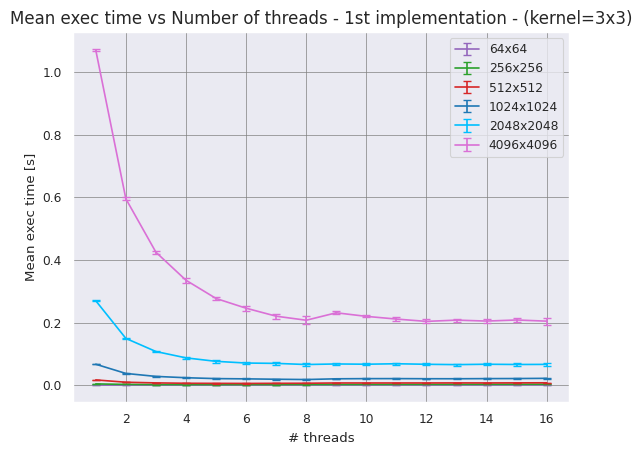

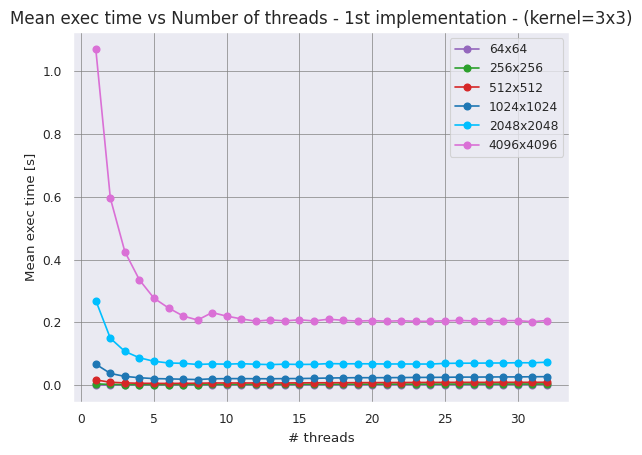

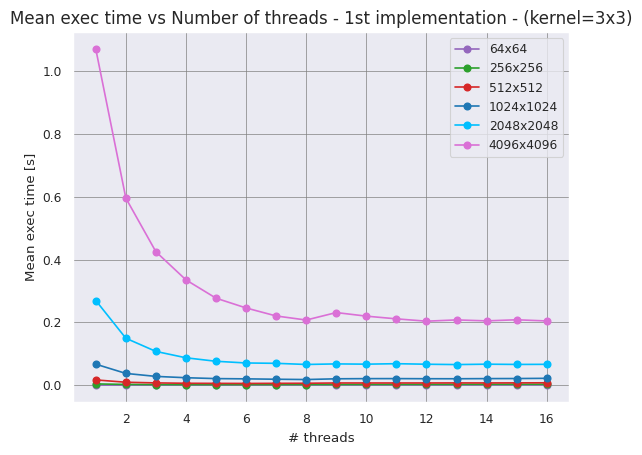

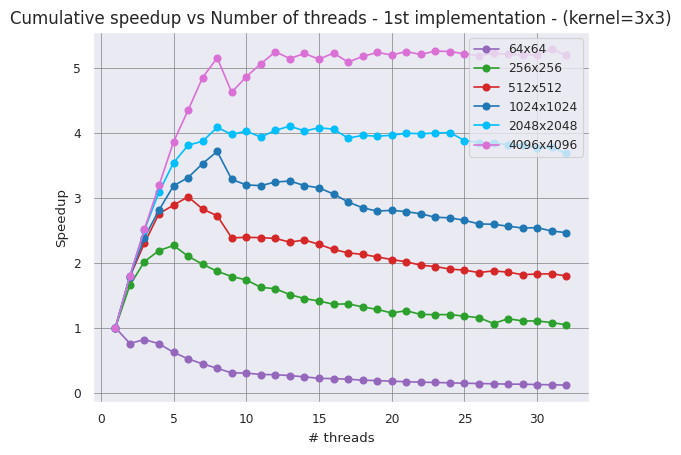

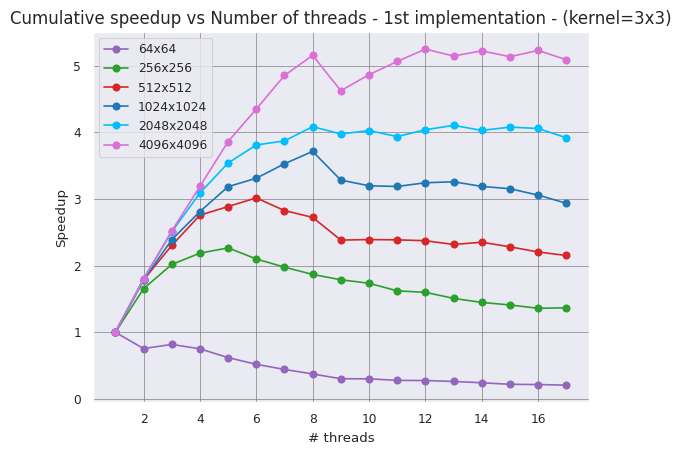

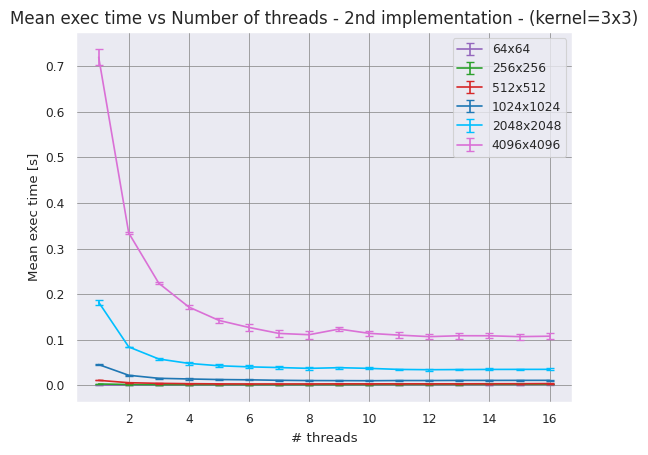

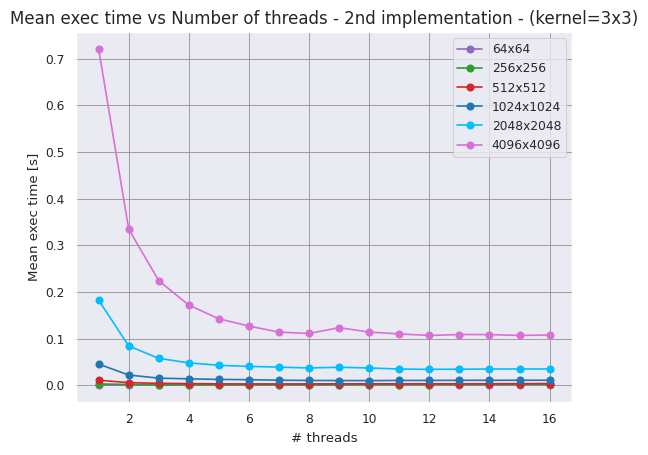

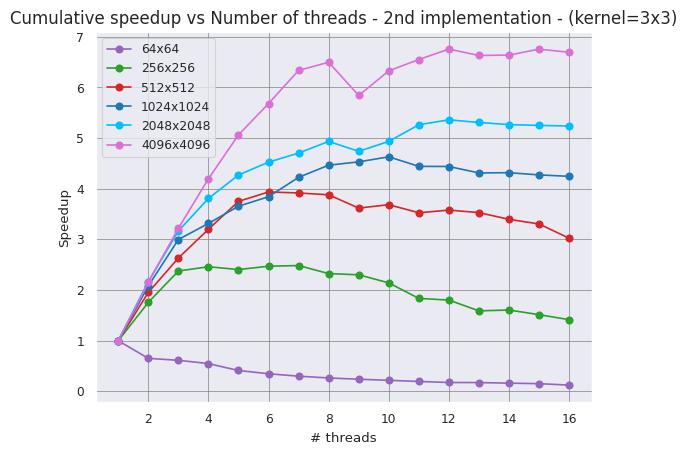

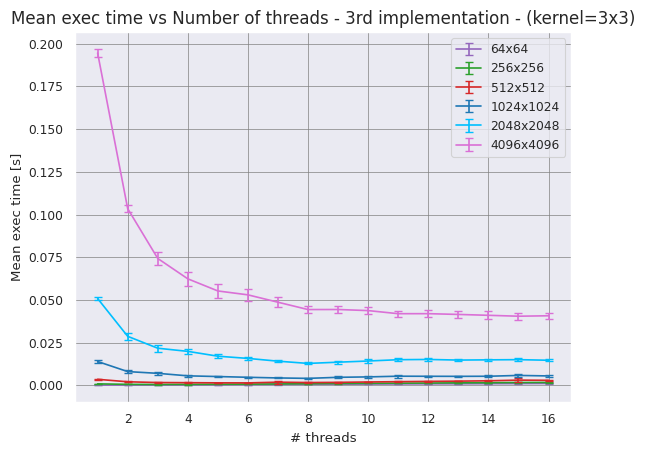

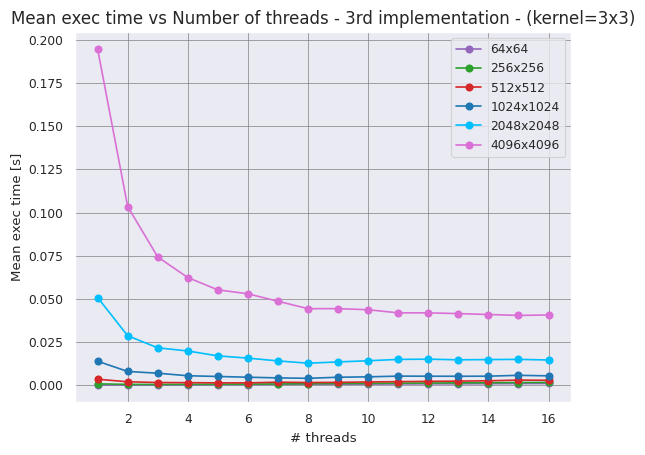

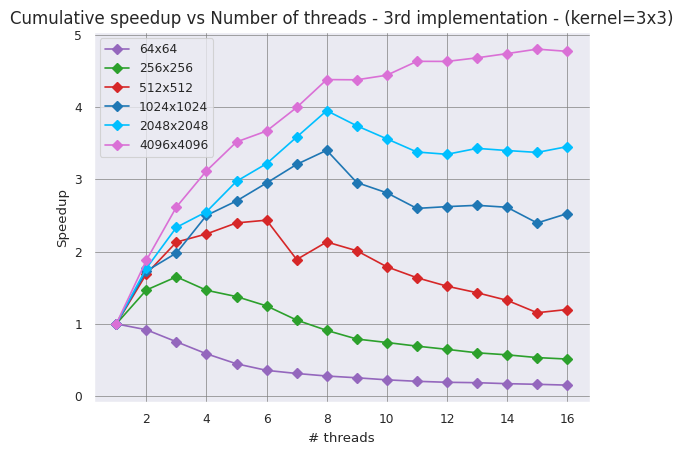

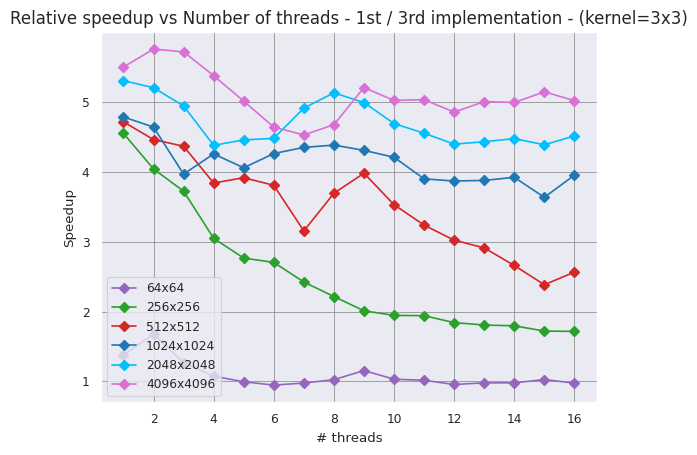

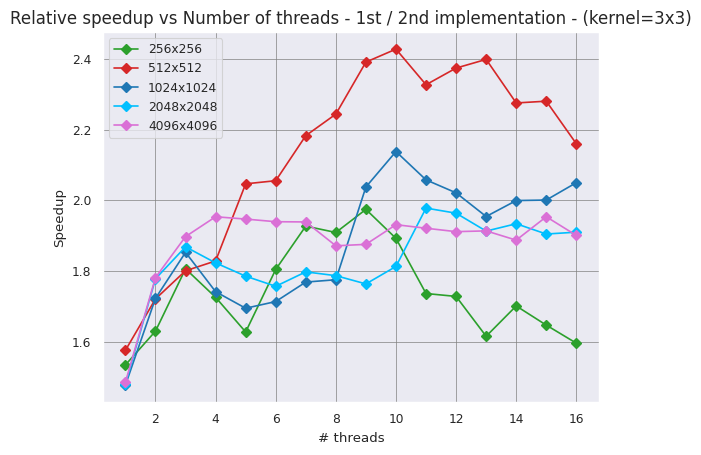

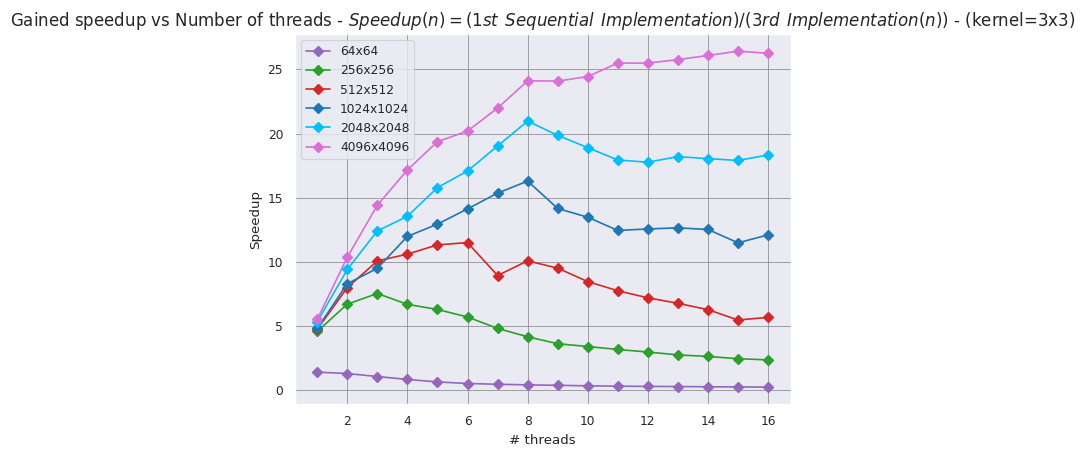

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context('paper')

path_PTHREAD = '../csv'


image_       = [64,256,512,1024,2048,4096]
colors       = ['tab:purple','tab:green','tab:red','tab:blue','deepskyblue','orchid','tab:olive','m','springgreen',
                'salmon','paleturquoise','dodgerblue','yellow','turquoise','royalblue','tomato','chartreuse']


def main():

    #####################################################################################################################################################
    #                                                          1st implementation (3x3)                                                                 #
    #####################################################################################################################################################

    mean_exec_time_1st_ci = [[],[],[],[],[],[]]
    ci_1st = [[],[],[],[],[],[]]

    # parse csv
    raw = pd.read_csv(path_PTHREAD + '/1st/exec_times_with_ci.csv')

    img, exec_times, ci_low, ci_high = raw[raw.columns[0]], raw[raw.columns[2]], raw[raw.columns[3]], raw[raw.columns[4]]

    for i in range(0,len(img)):
        if img[i] == 64:
            mean_exec_time_1st_ci[0].append(exec_times[i])
            ci_1st[0].append(ci_high[i] - ci_low[i])
        elif img[i] == 256:
            mean_exec_time_1st_ci[1].append(exec_times[i])
            ci_1st[1].append(ci_high[i] - ci_low[i])
        elif img[i] == 512:
            mean_exec_time_1st_ci[2].append(exec_times[i]) 
            ci_1st[2].append(ci_high[i] - ci_low[i])
        elif img[i] == 1024:
            mean_exec_time_1st_ci[3].append(exec_times[i])
            ci_1st[3].append(ci_high[i] - ci_low[i])
        elif img[i] == 2048:
            mean_exec_time_1st_ci[4].append(exec_times[i])
            ci_1st[4].append(ci_high[i] - ci_low[i])
        elif img[i] == 4096:
            mean_exec_time_1st_ci[5].append(exec_times[i])
            ci_1st[5].append(ci_high[i] - ci_low[i])

    for l in range(0,len(image_)):
        plt.errorbar(range(1,17),mean_exec_time_1st_ci[l],yerr=ci_1st[l],capsize=3,color=colors[l],barsabove=True,ecolor=colors[l],label=str(image_[l])+'x'+str(image_[l]))
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 1st implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_1st(3x3)_ci.png', bbox_inches='tight')
    plt.show()


    mean_exec_time_1st = [[],[],[],[],[],[]]

    # parse csv
    raw = pd.read_csv(path_PTHREAD + '/1st/exec_times.csv')

    img, exec_times, = raw[raw.columns[0]], raw[raw.columns[2]]

    for i in range(0,len(img)):
        if img[i] == 64:
            mean_exec_time_1st[0].append(exec_times[i])
        elif img[i] == 256:
            mean_exec_time_1st[1].append(exec_times[i])
        elif img[i] == 512:
            mean_exec_time_1st[2].append(exec_times[i]) 
        elif img[i] == 1024:
            mean_exec_time_1st[3].append(exec_times[i])
        elif img[i] == 2048:
            mean_exec_time_1st[4].append(exec_times[i])
        elif img[i] == 4096:
            mean_exec_time_1st[5].append(exec_times[i])

    for l in range(0,len(image_)):
        plt.plot(range(1,33),mean_exec_time_1st[l],marker='o',color=colors[l],label=str(image_[l])+'x'+str(image_[l]))
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 1st implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_1st(3x3)_full.png', bbox_inches='tight')
    plt.show()

    for l in range(0,len(image_)):
        plt.plot(range(1,17),mean_exec_time_1st[l][:16],marker='o',color=colors[l],label=str(image_[l])+'x'+str(image_[l]))
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 1st implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_1st(3x3)_reduced.png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(0,6):

        for j in range(0,32):

            speedup[i].append(mean_exec_time_1st[i][0] / mean_exec_time_1st[i][j])

        plt.plot(range(1,33),speedup[i],marker='o',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 1st implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,loc=1)
    plt.savefig('figures/cumulative_speedup_1st(3x3)_full.png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(0,6):

        for j in range(0,17):

            speedup[i].append(mean_exec_time_1st[i][0] / mean_exec_time_1st[i][j])

        plt.plot(range(1,18),speedup[i],marker='o',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 1st implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,loc=0)
    plt.savefig('figures/cumulative_speedup_1st(3x3)_reduced.png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                          2nd implementation (3x3)                                                                 #
    #####################################################################################################################################################

    mean_exec_time_2nd_ci = [[],[],[],[],[],[]]
    ci_2nd = [[],[],[],[],[],[]]

    # parse csv
    raw = pd.read_csv(path_PTHREAD + '/2nd/exec_times_with_ci.csv')

    img, exec_times, ci_low, ci_high = raw[raw.columns[0]], raw[raw.columns[2]], raw[raw.columns[3]], raw[raw.columns[4]]

    for i in range(0,len(img)):
        if img[i] == 64:
            mean_exec_time_2nd_ci[0].append(exec_times[i])
            ci_2nd[0].append(ci_high[i] - ci_low[i])
        elif img[i] == 256:
            mean_exec_time_2nd_ci[1].append(exec_times[i])
            ci_2nd[1].append(ci_high[i] - ci_low[i])
        elif img[i] == 512:
            mean_exec_time_2nd_ci[2].append(exec_times[i]) 
            ci_2nd[2].append(ci_high[i] - ci_low[i])
        elif img[i] == 1024:
            mean_exec_time_2nd_ci[3].append(exec_times[i])
            ci_2nd[3].append(ci_high[i] - ci_low[i])
        elif img[i] == 2048:
            mean_exec_time_2nd_ci[4].append(exec_times[i])
            ci_2nd[4].append(ci_high[i] - ci_low[i])
        elif img[i] == 4096:
            mean_exec_time_2nd_ci[5].append(exec_times[i])
            ci_2nd[5].append(ci_high[i] - ci_low[i])

    for l in range(0,len(image_)):
        plt.errorbar(range(1,17),mean_exec_time_2nd_ci[l],yerr=ci_2nd[l],capsize=3,color=colors[l],barsabove=True,ecolor=colors[l],label=str(image_[l])+'x'+str(image_[l]))
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 2nd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_2nd(3x3)_ci.png', bbox_inches='tight')
    plt.show()


    mean_exec_time_2nd = [[],[],[],[],[],[]]

    # parse csv
    raw = pd.read_csv(path_PTHREAD + '/2nd/exec_times.csv')

    img, exec_times = raw[raw.columns[0]], raw[raw.columns[2]]

    for i in range(0,len(img)):
        if img[i] == 64:
            mean_exec_time_2nd[0].append(exec_times[i])
        elif img[i] == 256:
            mean_exec_time_2nd[1].append(exec_times[i])
        elif img[i] == 512:
            mean_exec_time_2nd[2].append(exec_times[i]) 
        elif img[i] == 1024:
            mean_exec_time_2nd[3].append(exec_times[i])
        elif img[i] == 2048:
            mean_exec_time_2nd[4].append(exec_times[i])
        elif img[i] == 4096:
            mean_exec_time_2nd[5].append(exec_times[i])

    for l in range(0,len(image_)):
        
        plt.plot(range(1,17),mean_exec_time_2nd[l],marker='o',color=colors[l],label=str(image_[l])+'x'+str(image_[l]))

    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 2nd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_2nd(3x3).png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(0,6):

        for j in range(0,16):

            speedup[i].append(mean_exec_time_2nd[i][0] / mean_exec_time_2nd[i][j])

        plt.plot(range(1,17),speedup[i],marker='o',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 2nd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/cumulative_speedup_2nd(3x3).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                          3rd implementation (3x3)                                                                 #
    #####################################################################################################################################################

    mean_exec_time_3rd_ci = [[],[],[],[],[],[]]
    ci_3rd = [[],[],[],[],[],[]]

    # parse csv
    raw = pd.read_csv(path_PTHREAD + '/3rd/exec_times_with_ci.csv')

    img, exec_times, ci_low, ci_high = raw[raw.columns[0]], raw[raw.columns[2]], raw[raw.columns[3]], raw[raw.columns[4]]

    for i in range(0,len(img)):
        if img[i] == 64:
            mean_exec_time_3rd_ci[0].append(exec_times[i])
            ci_3rd[0].append(ci_high[i] - ci_low[i])
        elif img[i] == 256:
            mean_exec_time_3rd_ci[1].append(exec_times[i])
            ci_3rd[1].append(ci_high[i] - ci_low[i])
        elif img[i] == 512:
            mean_exec_time_3rd_ci[2].append(exec_times[i]) 
            ci_3rd[2].append(ci_high[i] - ci_low[i])
        elif img[i] == 1024:
            mean_exec_time_3rd_ci[3].append(exec_times[i])
            ci_3rd[3].append(ci_high[i] - ci_low[i])
        elif img[i] == 2048:
            mean_exec_time_3rd_ci[4].append(exec_times[i])
            ci_3rd[4].append(ci_high[i] - ci_low[i])
        elif img[i] == 4096:
            mean_exec_time_3rd_ci[5].append(exec_times[i])
            ci_3rd[5].append(ci_high[i] - ci_low[i])

    for l in range(0,len(image_)):
        plt.errorbar(range(1,17),mean_exec_time_3rd_ci[l],yerr=ci_3rd[l],capsize=3,color=colors[l],barsabove=True,ecolor=colors[l],label=str(image_[l])+'x'+str(image_[l]))
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 3rd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_3rd(3x3)_ci.png', bbox_inches='tight')
    plt.show()


    mean_exec_time_3rd = [[],[],[],[],[],[]]

    # parse csv
    raw = pd.read_csv(path_PTHREAD + '/3rd/exec_times.csv')

    img, exec_times = raw[raw.columns[0]], raw[raw.columns[2]]

    for i in range(0,len(img)):
        if img[i] == 64:
            mean_exec_time_3rd[0].append(exec_times[i])
        elif img[i] == 256:
            mean_exec_time_3rd[1].append(exec_times[i])
        elif img[i] == 512:
            mean_exec_time_3rd[2].append(exec_times[i]) 
        elif img[i] == 1024:
            mean_exec_time_3rd[3].append(exec_times[i])
        elif img[i] == 2048:
            mean_exec_time_3rd[4].append(exec_times[i])
        elif img[i] == 4096:
            mean_exec_time_3rd[5].append(exec_times[i])

    for l in range(0,len(image_)):
        
        plt.plot(range(1,17),mean_exec_time_3rd[l],marker='o',color=colors[l],label=str(image_[l])+'x'+str(image_[l]))

        
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 3rd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/mean_exec_time_3rd(3x3).png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(0,6):

        for j in range(0,16):

            speedup[i].append(mean_exec_time_3rd[i][0] / mean_exec_time_3rd[i][j])

        plt.plot(range(1,17),speedup[i],marker='D',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 3rd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/cumulative_speedup_3rd(3x3).png', bbox_inches='tight')
    plt.show()
    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                       Relative speed-up - 1st/3rd (3x3)                                                           #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]

    for i in range(0,6):

        for j in range(0,16):

            speedup[i].append(mean_exec_time_1st[i][j] / mean_exec_time_3rd[i][j])

        plt.plot(range(1,17),speedup[i],marker='D',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Relative speedup vs Number of threads - 1st / 3rd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/relative_speedup_1st_vs_3rd(3x3).png', bbox_inches='tight')
    plt.show()
    #####################################################################################################################################################

    #####################################################################################################################################################
    #                                                       Relative speed-up - 1st/2nd (3x3)                                                           #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]

    for i in range(1,6):

        for j in range(0,16):

            speedup[i].append(mean_exec_time_1st[i][j] / mean_exec_time_2nd[i][j])

        plt.plot(range(1,17),speedup[i],marker='D',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Relative speedup vs Number of threads - 1st / 2nd implementation - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/relative_speedup_1st_vs_2nd(3x3).png', bbox_inches='tight')
    plt.show()
    #####################################################################################################################################################

    #####################################################################################################################################################
    #                                                       Relative speed-up - 1st/3rd (3x3)                                                           #
    #####################################################################################################################################################

    speedup    = [[],[],[],[],[],[]]

    for i in range(0,6):

        for j in range(0,16):

            speedup[i].append(mean_exec_time_1st[i][0] / mean_exec_time_3rd[i][j])

        plt.plot(range(1,17),speedup[i],marker='D',color=colors[i],label=str(image_[i])+'x'+str(image_[i]))


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Gained speedup vs Number of threads - $Speedup(n) = (1st\:\:Sequential\:\:Implementation)/(3rd\:\:Implementation(n))$ - (kernel=3x3)',fontsize=12)
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    #plt.savefig('figures/relative_speedup_1st_vs_3rd(3x3).png', bbox_inches='tight')
    plt.show()
    #####################################################################################################################################################


if __name__ == '__main__':
    main()